In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# File to Load
load_credits = "Dataset/credits.csv"
load_titles = "Dataset/titles.csv"

# Read School and Student Data File and store into Pandas DataFrames
credits_data = pd.read_csv(load_credits)
titles_data = pd.read_csv(load_titles)
titles_data=titles_data[titles_data["release_year"]>2010]

# Combine the data into a single dataset.  
netflix_data = pd.merge(credits_data, titles_data, how="left", on=["id", "id"])
#netflix_data.head()
netflix_data=netflix_data[['name','character','release_year','genres','imdb_score','tmdb_popularity','tmdb_score']]
#drop NA
netflix_data.dropna()


,name,character,release_year,genres,imdb_score,tmdb_popularity,tmdb_score
13572,Vanessa Redgrave,Mature Jenny,2012.0,"['drama', 'history', 'european']",8.5,24.955,7.4
13573,Helen George,Trixie Franklin,2012.0,"['drama', 'history', 'european']",8.5,24.955,7.4
13574,Leonie Elliott,Nurse Lucille Anderson,2012.0,"['drama', 'history', 'european']",8.5,24.955,7.4
13575,Jenny Agutter,Sister Julienne,2012.0,"['drama', 'history', 'european']",8.5,24.955,7.4
13576,Judy Parfitt,Sister Monica Joan,2012.0,"['drama', 'history', 'european']",8.5,24.955,7.4
...,...,...,...,...,...,...,...
77129,Asri Welas,Wulan,2021.0,"['comedy', 'drama', 'romance']",6.2,2.227,8.0
77130,Mo Sidik,Faris,2021.0,"['comedy', 'drama', 'romance']",6.2,2.227,8.0
77131,Emil Kusumo,Anton,2021.0,"['comedy', 'drama', 'romance']",6.2,2.227,8.0
77132,Dede Satria,Tomi,2021.0,"['comedy', 'drama', 'romance']",6.2,2.227,8.0


In [37]:
movie_genre=netflix_data.set_index(["genres"])["name"]
movie_counts=netflix_data["genres"].value_counts()
movie_counts2=movie_counts

['comedy']                                                           3819
['drama']                                                            3544
['comedy', 'drama']                                                  2088
['documentation']                                                    1628
['drama', 'comedy']                                                  1571
                                                                     ... 
['documentation', 'animation', 'scifi']                                 1
['drama', 'fantasy', 'horror', 'thriller', 'crime']                     1
['drama', 'romance', 'thriller', 'animation', 'crime', 'fantasy']       1
['crime', 'drama', 'comedy', 'action']                                  1
['drama', 'horror', 'crime']                                            1
Name: genres, Length: 1377, dtype: int64

In [54]:
#Quantity of this genre
movie_counts=netflix_data["genres"].value_counts()
#df.loc[df['col1'] == value]
movie_counts_df = pd.DataFrame(movie_counts) 
movie_counts_df = movie_counts_df.reset_index()
movie_counts_df.columns = ['Genres', 'Counts']
movie_counts_df
#df.loc[df['column_name'] == some_value]

movie_counts_df.loc[movie_counts_df['Genres']=="['documentation']"]

,Genres,Counts
3,['documentation'],1628


In [12]:
#sort genres
doc_data=netflix_data[netflix_data["genres"]=="['documentation']"]
#group by year
doc_by_year=doc_data.groupby(["release_year"])
#do I need to separate genres?
#find IMDB ratings
doc_IMDB_avg=doc_by_year[["imdb_score"]].mean()
#turn into df
doc_IMDB_df=pd.DataFrame(doc_IMDB_avg)
#rename columns
doc_IMDB_df.rename(columns = {'imdb_score':'Average Ratings'}, inplace = True)
doc_IMDB_df

,Average Ratings
release_year,
2012.0,7.500000
2013.0,6.708000
2014.0,7.336364
2015.0,7.049206
2016.0,7.102740
2017.0,6.998780
2018.0,7.152362
2019.0,7.030041
2020.0,7.436424


<IPython.core.display.Javascript object>


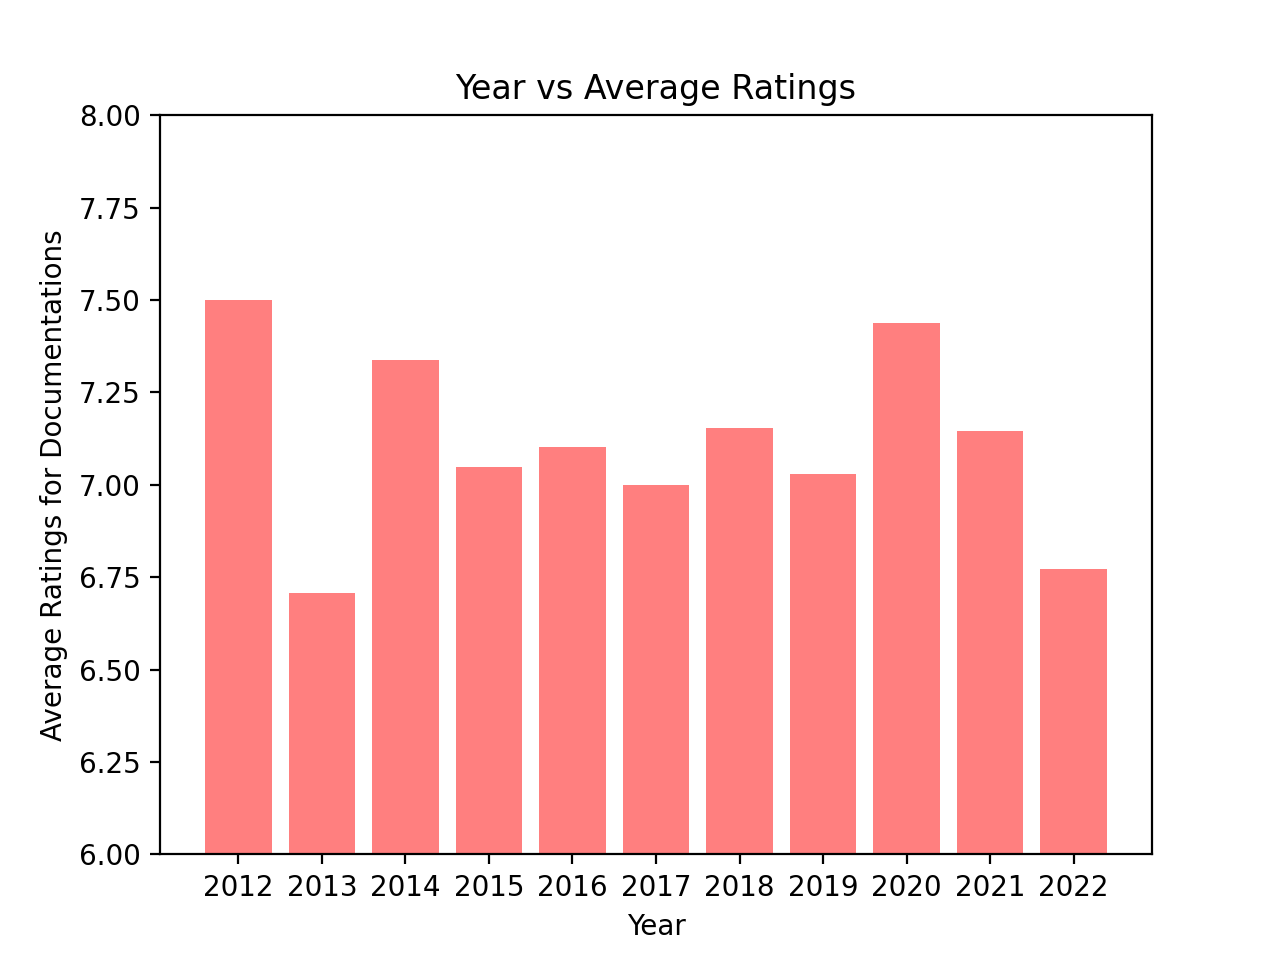

In [26]:
#visualization 1: year vs IMDB score
%matplotlib notebook
x_axis = np.arange(len(doc_IMDB_df["Average Ratings"]))
y_axis=(doc_IMDB_df["Average Ratings"])
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014", "2015", "2016","2017",
                            "2018","2019","2020","2021","2022"])
plt.title("Year vs Average Ratings")
plt.xlabel("Year")
plt.ylabel("Average Ratings for Documentations")
plt.ylim(6, 8)
plt.savefig("Images/YearVRatings.png")
plt.show()